In [59]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# abre el archivo CSV en modo lectura y crea un objeto de archivo CSV
with open('kc_house_data.csv', 'r') as file:
    csv_reader = csv.reader(file)

    # lee las filas del archivo CSV en una lista
    rows = []
    for row in csv_reader:
        rows.append(row)
        
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=1)

dataSize = data.shape[0]  # numero de filas

# convierte la lista de filas en un array de NumPy
array = np.array(rows)

# imprime el array
#print(array)

# Convierte las columnas de texto a valores numéricos
X = array[1:, 5].astype(float).reshape(-1, 1)  # Pies cuadrados del espacio habitable interior
y = array[1:, 2].astype(float).reshape(-1, 1)  # Precio

# x va a ser la variable de pies cuadrados del espacio habitable interior
# Y va a ser la variable de precio

# agrega una columna de 1s a la matriz de características

Xr = np.hstack((np.ones_like(X), X))

print(Xr)
print(X.shape)
print(y.shape)

# JUSTAR EL POLINOMIO UTILIZANDO LA FUNCIÓN POLYFIT, LUEGO USAR LA FUNCIÓN POLY1D PARA MOSTRAR LAS FUNCIONES POLINOMALES

#f = np.polyfit(X[:,0], y[:,0], 2)
#p = np.poly1d(f)

# Imprime la función polinomial
# Esto significa que la línea de mejor ajuste proporcionada automáticamente por la función Polyfit

#print(p)




[[1.00e+00 1.18e+03]
 [1.00e+00 2.57e+03]
 [1.00e+00 7.70e+02]
 ...
 [1.00e+00 1.02e+03]
 [1.00e+00 1.60e+03]
 [1.00e+00 1.02e+03]]
(21613, 1)
(21613, 1)


In [60]:
#funciond de regresion lineal
# retorna el costo de la regresión lineal y 
def linreg(X, y, t, cost, grad, a=0.1, n=100, onStep=None):
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if onStep:
            onStep(t)

    return t, costs

In [61]:
# función de costo y gradiente para regresión lineal
# X = matriz de características
# y = vector de valores objetivo

cost = lambda X,y,t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X,y,t : 2 * X.T @ (X @ t - y) / len(y)

In [62]:


# Definimos el t inicial como un valor random
to = np.random.rand(Xr.shape[1], 1)

tf, costs = linreg(Xr,
                   y,
                   to,
                   cost,
                   grad,
                   a=0.0000000025,
                   n=100)

# Definimos el valor de xm  
xm = np.array([[0], [dataSize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos ym 
ym = xmr @ tf
print(xm.shape, ym.shape)



(2, 1) (2, 1)


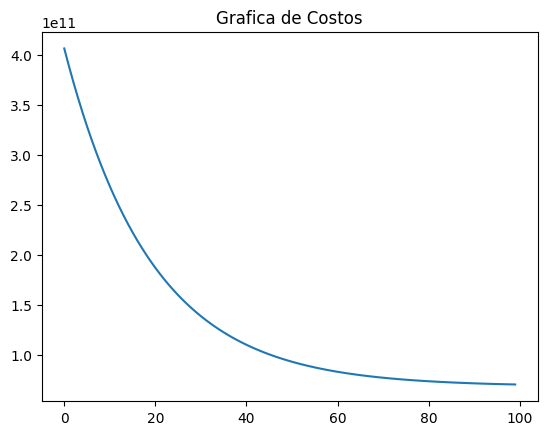

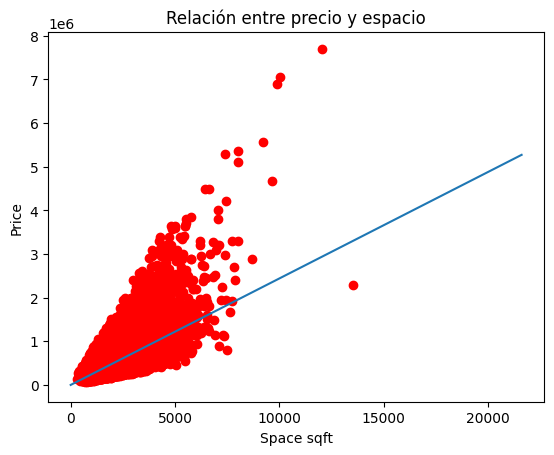

In [63]:
#grafica de los datos


plt.plot(costs)
plt.title("Grafica de Costos")
plt.show()

plt.plot(X, y, 'ro')
plt.plot(xm, ym)
plt.title("Relación entre precio y espacio")
plt.xlabel('Space sqft')
plt.ylabel('Price')
plt.show()

